In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikit as sk
import technicalIndicators as ti
%matplotlib inline

#columns to use in addition to the prev day returns
X_cols = ['close', 'high', 'low', 'volumefrom', 'volumeto', 'open',
          'bdy_sent_neg', 'bdy_sent_neu', 'bdy_sent_compound', 'title_sent_pos',
          'title_sent_neg', 'title_sent_neu', 'title_sent_compound']

X, ret = sk.load_X_returns('Data/BTC/BTC-2018-11-27-sent.csv',  X_cols)
df = pd.read_csv('Data/BTC/BTC-2018-11-27.csv')

/Users/kat/Documents/nicolaus copernicus/soup4lyfe/scikit.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X['returns'] = returns


In [2]:
import imp
imp.reload(sk)
imp.reload(ti)

<module 'technicalIndicators' from '/Users/kat/Documents/nicolaus copernicus/soup4lyfe/technicalIndicators.py'>

In [4]:
def plot_returns(df, returns_col, color, label, cum_only = False):
    if not cum_only:
        plt.plot(df.timestamp, df[returns_col], color + 'o', label = label)
    plt.plot(df.timestamp, np.cumsum(df[returns_col]), color + '-', label = 'Cumulative ' + label)

In [5]:
def test_two_strats(X, ret, df, model, model_str, _init = True, _display = True,
                    _swing = True, _daily = True, _strat_lab = True, bucketing = sk.kat, _mc = 3):
    if _swing:
        a = sk.test_returns(X, ret, df, model, daily = False, bucketing = bucketing, _mc = _mc)
        a.timestamp = pd.to_datetime(a.timestamp)
    if _daily:
        b = sk.test_returns(X, ret, df, model, daily = True, bucketing = bucketing, _mc = _mc)
        b.timestamp = pd.to_datetime(b.timestamp)
    
    if _init:
        plt.figure(figsize=(15, 9.5))
    if _swing:
        plot_returns(a, 'close_pct_change', 'b' if _strat_lab else '', 'Swing Trading Returns' if _strat_lab else (model_str + ' Returns'), cum_only = not _strat_lab)
    if _daily:
        plot_returns(b, 'returns', 'g' if _strat_lab else '', 'Daily Trading Returns' if _strat_lab else (model_str + ' Returns'), cum_only = not _strat_lab)
    if _display:
        plt.axhline(y = 0, color = 'k')
        plt.title(model_str +' Performance')
        plt.ylabel('Percentage Returns')
        plt.legend()

In [6]:
def test_many_models(X, ret, df, models, model_strs, daily = True):
    strat = 'Daily ' if daily else 'Swing '
    _init = True
    for model, model_str in zip(models, model_strs):
        test_two_strats(X, ret, df, model, model_str, _init = _init, _display = False, 
                        _swing = (False if daily else True), _daily = (True if daily else False), _strat_lab = False)
        _init = False
    plt.axhline(y = 0, color = 'k')
    plt.title(strat +'Trading Strategy Performance by Model')
    plt.ylabel('Percentage Returns')
    plt.legend()

/Users/kat/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


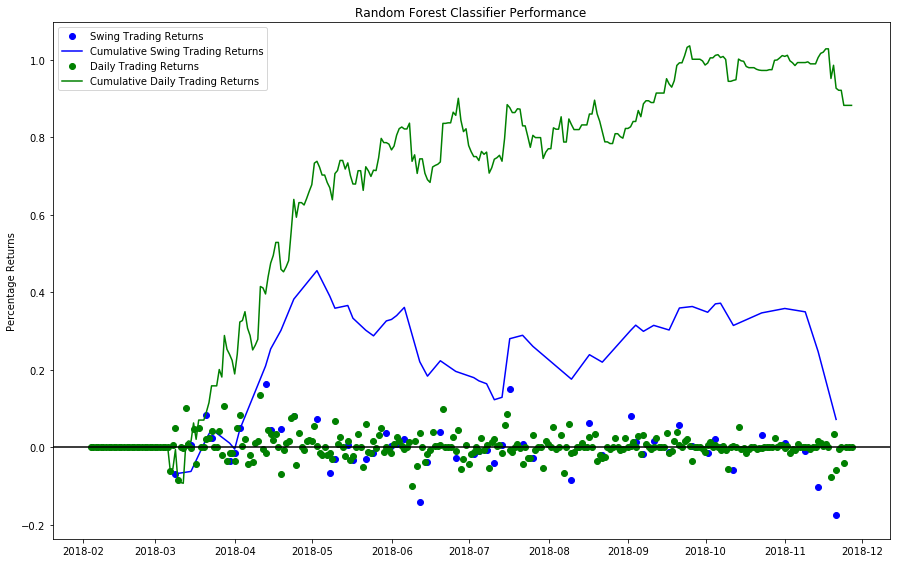

In [7]:
from sklearn.ensemble import RandomForestClassifier
test_two_strats(X, ret, df, RandomForestClassifier(), 'Random Forest Classifier')

In [8]:
plt.close()

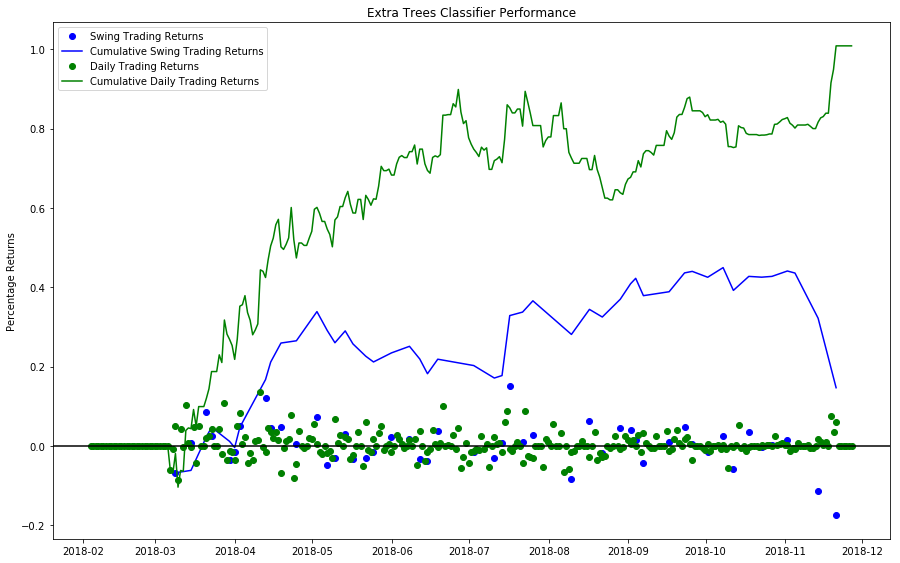

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
test_two_strats(X, ret, df, ExtraTreesClassifier(), 'Extra Trees Classifier')

In [10]:
plt.close()

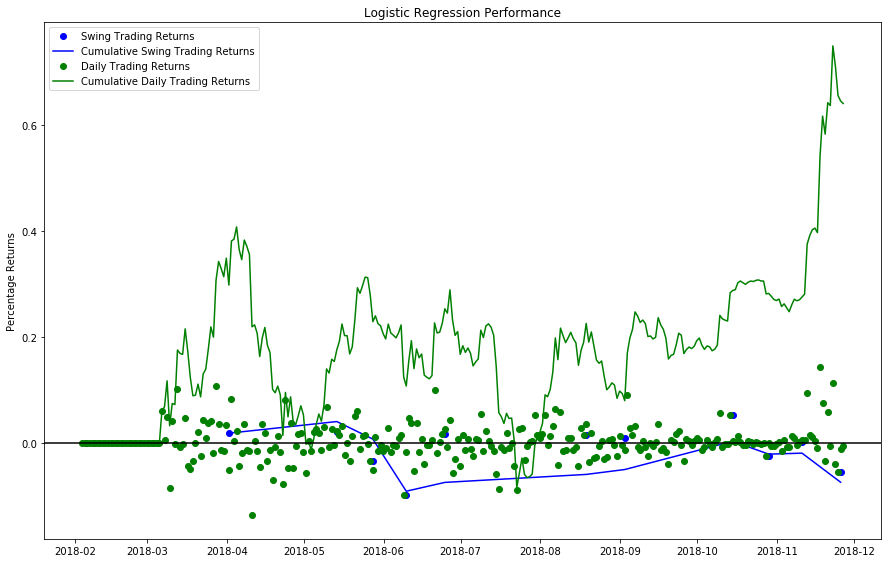

In [11]:
from sklearn.linear_model import LogisticRegression
test_two_strats(X, ret, df, LogisticRegression(), 'Logistic Regression', bucketing = lambda x: sk.kat(x, 0.01, 1), _mc = 1)

In [12]:
plt.close()

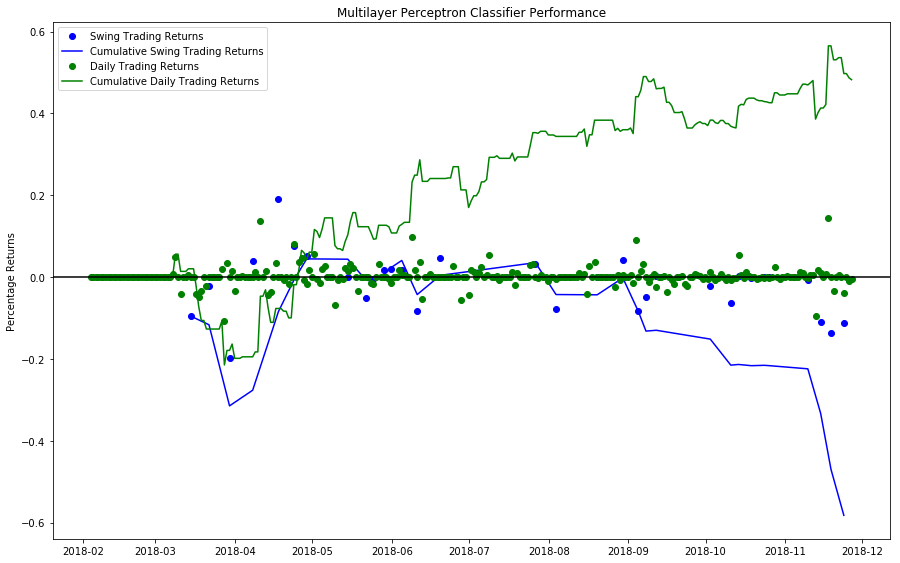

In [13]:
from sklearn.neural_network import MLPClassifier
test_two_strats(X, ret, df, MLPClassifier(), 'Multilayer Perceptron Classifier')

In [14]:
plt.close()

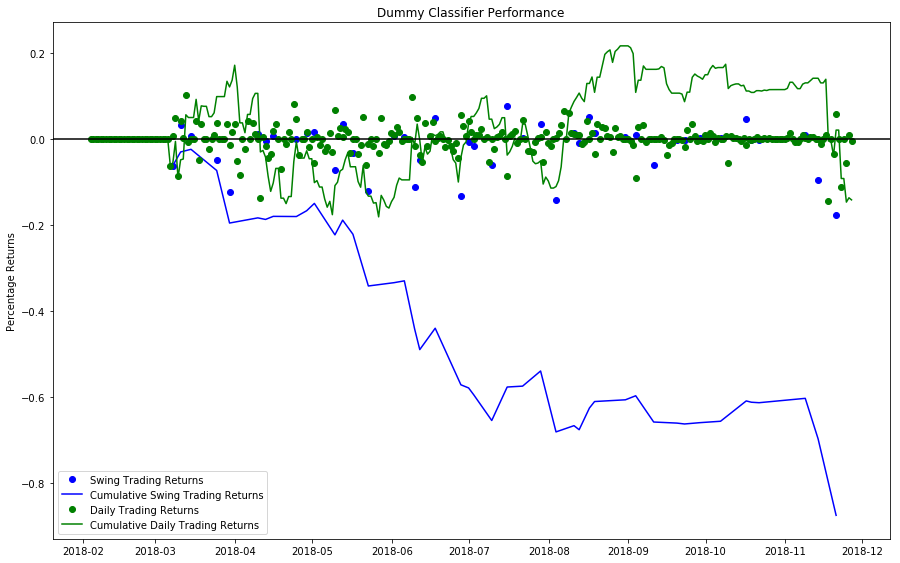

In [15]:
from sklearn.dummy import DummyClassifier
test_two_strats(X, ret, df, DummyClassifier(), 'Dummy Classifier')

In [16]:
plt.close()

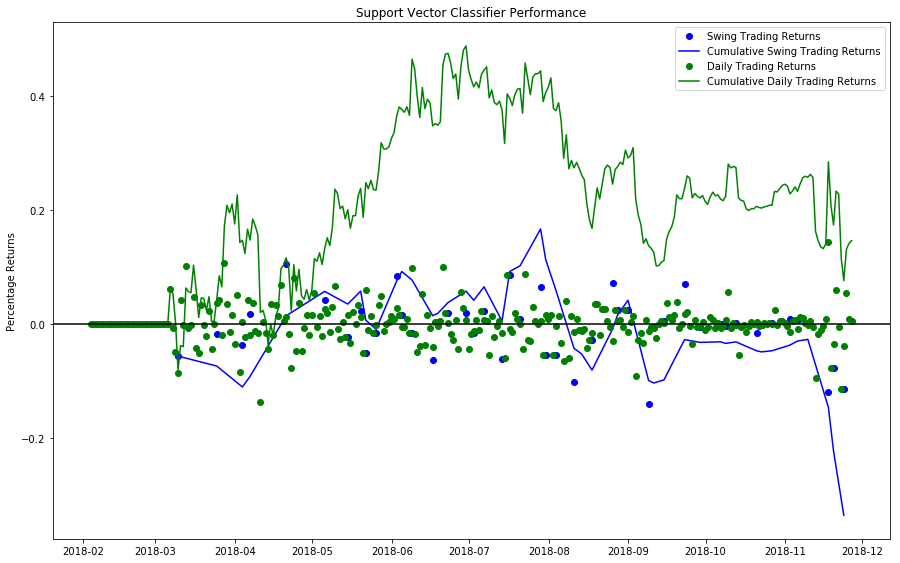

In [17]:
from sklearn.svm import SVC
test_two_strats(X, ret, df, SVC(), 'Support Vector Classifier')

In [18]:
plt.close()

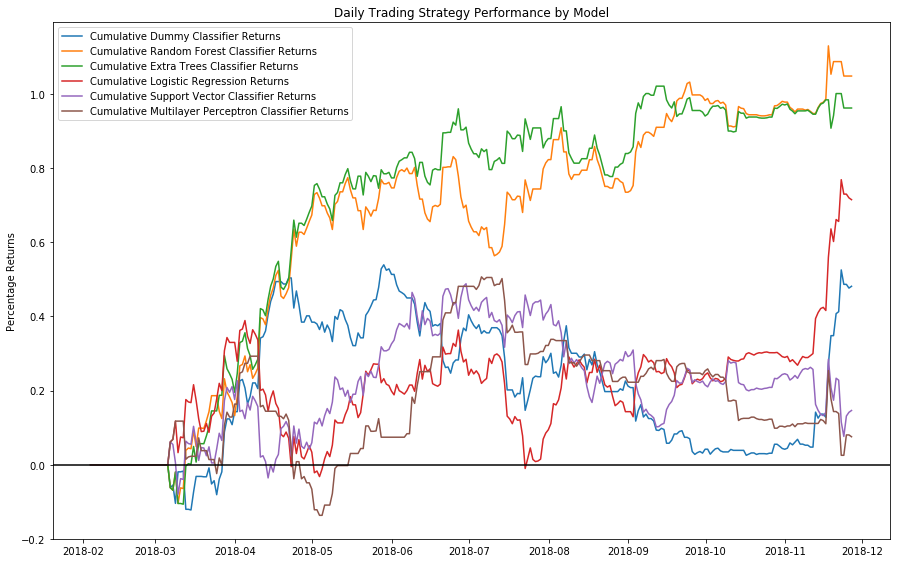

In [19]:
test_many_models(X, ret, df, [DummyClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), LogisticRegression(), SVC() ,MLPClassifier()], 
                 ['Dummy Classifier', 'Random Forest Classifier', 'Extra Trees Classifier', 'Logistic Regression', 
                  'Support Vector Classifier', 'Multilayer Perceptron Classifier'],
                 daily = True)

In [20]:
plt.close()

single positional indexer is out-of-bounds


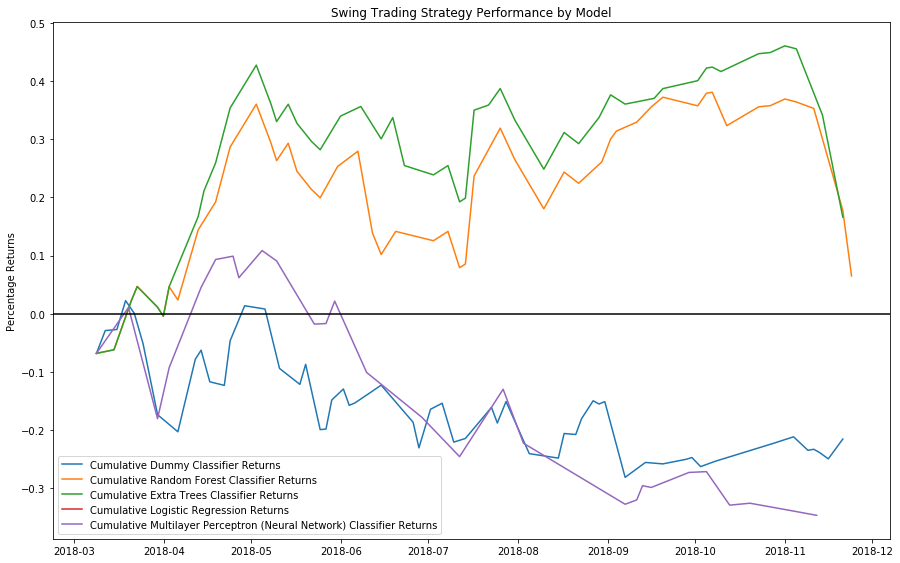

In [21]:
test_many_models(X, ret, df, [DummyClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), LogisticRegression(), MLPClassifier()], 
                 ['Dummy Classifier', 'Random Forest Classifier', 'Extra Trees Classifier', 'Logistic Regression', 'Multilayer Perceptron (Neural Network) Classifier'],
                 daily = False)

In [22]:
plt.close()